## Машинное обучение — Итоговая аттестация

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pickle
import pandas as pd
import tensorflow as tf
from keras import layers, models
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

### Загрузка данных

In [3]:
def load_cifar10_data():
    train_data = {}
    for i in range(1, 6):
        with open(f'cifar-10-batches-py/data_batch_{i}', 'rb') as f:
            new_data = pickle.load(f, encoding='bytes')
            train_data = dict(list(train_data.items()) + list(new_data.items()))
    
    X_train = np.array(train_data[b'data'], dtype=np.float32) / 255.0
    y_train = np.array(train_data[b'labels'])
    
    with open(f'cifar-10-batches-py/test_batch', 'rb') as f:
        test_data = pickle.load(f, encoding='bytes')
    
    # Preprocess data
    X_test = np.array(test_data[b'data'], dtype=np.float32) / 255.0  # Normalize pixel values and change data type to float32
    y_test = np.array(test_data[b'labels'])

    return (X_train, y_train), (X_test, y_test)

(X_train, y_train), (X_test, y_test) = load_cifar10_data()
print(X_train)
print(y_train)
print()
print(X_test)
print(y_test)

[[1.         0.9882353  0.99215686 ... 0.6784314  0.90588236 0.972549  ]
 [0.49803922 0.49411765 0.49803922 ... 0.4        0.42352942 0.4392157 ]
 [0.45490196 0.2509804  0.07450981 ... 0.02745098 0.02352941 0.01960784]
 ...
 [0.13725491 0.15686275 0.16470589 ... 0.3019608  0.25882354 0.19607843]
 [0.7411765  0.7294118  0.7254902  ... 0.6627451  0.67058825 0.67058825]
 [0.8980392  0.9254902  0.91764706 ... 0.6784314  0.63529414 0.6313726 ]]
[1 8 5 ... 9 1 1]

[[0.61960787 0.62352943 0.64705884 ... 0.4862745  0.5058824  0.43137255]
 [0.92156863 0.90588236 0.9098039  ... 0.69803923 0.7490196  0.78039217]
 [0.61960787 0.61960787 0.54509807 ... 0.03137255 0.01176471 0.02745098]
 ...
 [0.07843138 0.07450981 0.05882353 ... 0.19607843 0.20784314 0.18431373]
 [0.09803922 0.05882353 0.09019608 ... 0.3137255  0.31764707 0.3137255 ]
 [0.28627452 0.38431373 0.3882353  ... 0.36862746 0.22745098 0.10196079]]
[3 8 8 ... 5 1 7]


### 1. Объясните, какие элементы вашей сети зависят от количества цветов, какие — от количества классов

Элементы сети, зависящие от количества цветов:
1. количество нейронов во входном слое;
2. количество весов;
3. количество связей.

Элементы сети, зависящие от количества классов для датасета CIFAR-10:
1. также количество нейронов в выходном слое;
2. функция активации.

### 2. Обучить модель. Объяснить место в модели каждого слоя, обосновать выбор гиперпараметров

Всего слоя в моей сети четыре:
1. Входной слой - 64 нейрона
2. Скрытые слои - 256 и 64 нейрона
3. Выходной слой - 10 нейронов (совпадает с количеством слоев)

Количество нейронов во всех слоях, кроме выходного, получено эмпирически, изначально взял 1024 (32х32), но обратил внимание, что финальное значение accuracy не менялось при уменьшии количества входных нейронов, а скорость возрастала многократно 

In [4]:
# Обучение модели
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

# Оценка качества модели
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)

Epoch 1/10
313/313 [==============================] - 2s 3ms/step - loss: 2.0639 - accuracy: 0.2294
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 1.9017 - accuracy: 0.2970
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 1.8514 - accuracy: 0.3276
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 1.8159 - accuracy: 0.3351
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 1.7689 - accuracy: 0.3560
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 1.7554 - accuracy: 0.3658
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 1.7302 - accuracy: 0.3726
Epoch 8/10
313/313 [==============================] - 1s 3ms/step - loss: 1.7198 - accuracy: 0.3811
Epoch 9/10
313/313 [==============================] - 1s 3ms/step - loss: 1.6851 - accuracy: 0.3922
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 1.7419 - accuracy: 0.3691

### 3. Сравнить качество предсказания при обучении на 20 широких классах с предсказаниями при обучении на 100 узких классах, обобщив предсказания по узким меткам до метки их широкого класса в соответствии с таблицей

In [5]:
EPOCH_COUNT = 1

def get_data(label_mode: str):
    (x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode=label_mode)

    x_train = x_train / 255.0
    x_test = x_test / 255.0
    y_train = to_categorical(y_train, 100)
    y_test = to_categorical(y_test, 100)

    return (x_train, y_train), (x_test, y_test)

def get_params_by_model(label_mode: str):
    (X_train, y_train), (X_test, y_test) = get_data(label_mode)
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(100, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=EPOCH_COUNT)
    return model.evaluate(X_test, y_test)

accuracy_coarse = get_params_by_model('coarse')[1]
accuracy_fine = get_params_by_model('fine')[1]

print("Accuracy на 100 точных классах:", accuracy_fine)
print("Accuracy на 20 грубых классах:", accuracy_coarse)

if accuracy_fine > accuracy_coarse:
    print("Предсказание на основе 100 точных классов оказалось точнее")
else:
    print("Предсказание на основе 20 грубых классов оказалось точнее")

313/313 [==============================] - 2s 6ms/step - loss: 3.0507 - accuracy: 0.2801
Accuracy на 100 точных классах: 0.2800999879837036
Accuracy на 20 грубых классах: 0.36809998750686646
Предсказание на основе 20 грубых классов оказалось точнее


### 4. Исследовать с помощью графиков метрики предсказания для каких узких классов более всего отличаются от метрик их более широких классов. Выдвинуть предположение о причине возможного отличия

313/313 [==============================] - 3s 10ms/step


c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

313/313 [==============================] - 3s 9ms/step


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (20,) and arg 1 with shape (80,).

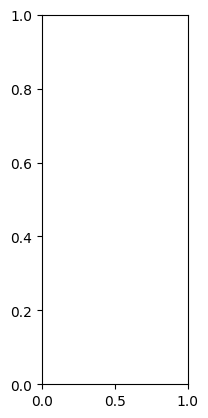

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

def load_report(label_mode: str):
    (x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode=label_mode)
    y_train = to_categorical(y_train, 100)
    y_test = to_categorical(y_test, 100)

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(100, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=1, batch_size=64, validation_data=(x_test, y_test))

    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    report_coarse = classification_report(y_true, y_pred_classes, output_dict=True)
    report = pd.DataFrame(report_coarse)
    return report.T

fine_classes = list(range(0, 100))
coarse_classes = list(range(0, 20))

fine_report = load_report("fine")
coarse_report = load_report("coarse")

params = ['precision', 'recall', 'f1-score']
for index in range(len(params)):
    param = params[index]
    coarse_param = [coarse_report[param].iloc[i] for i in coarse_classes]
    fine_param = [fine_report[param].iloc[i] for i in fine_classes]
    plt.subplot(1, 3, index + 1)
    plt.bar(np.arange(len(coarse_classes)), coarse_param * 4, width=0.4, label='Coarse Classes')
    plt.bar(np.arange(len(fine_classes)), fine_param, width=0.4, label='Fine Classes')
    plt.xlabel('Class')
    plt.ylabel(param)
    plt.legend()

plt.show()

По графику очевидно, что наиболее расхождение у насекомых и построек, что может быть связано с огромным многообразием этих объектов